# Project 1, Part 2

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import sklearn as sk
import sklearn.linear_model as lm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Setup

First, we read in the data and check that it is as we want for the model.

In [2]:
cars = pd.read_csv('cars.csv')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    392 non-null    int64  
 1   mpg           392 non-null    float64
 2   cylinders     392 non-null    int64  
 3   displacement  392 non-null    float64
 4   horsepower    392 non-null    int64  
 5   weight        392 non-null    int64  
 6   acceleration  392 non-null    float64
 7   model_year    392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 24.6 KB


Saving the data set added an additional index column, which should be dropped.

In [3]:
cars.drop('Unnamed: 0', axis=1, inplace=True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.6 KB


## Building the Model

The data is split. Most is used to "train" the linear regression model. The rest is used to test it.

In [4]:
X = cars.drop('mpg', axis=1, inplace=False)
y = cars['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

The model is then trained with the training data.

In [5]:
lr = lm.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

## Results

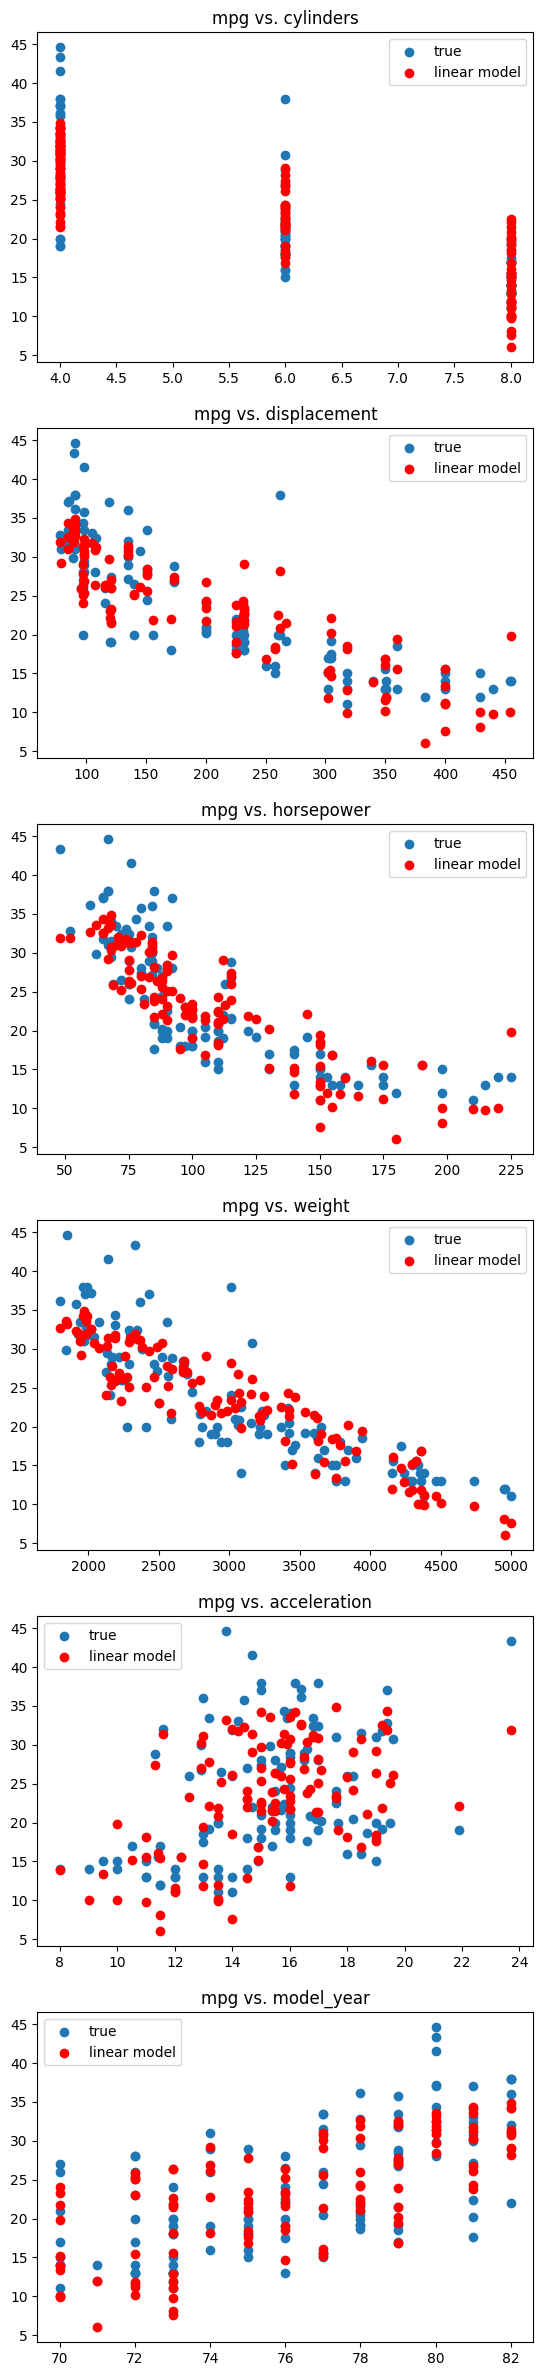

In [6]:
y_predict = lr.predict(X_test)

ivar = X.columns.tolist()
ivar

fig, ax = fig, ax = plt.subplots(6)
for i in range(0, 6):
    ax[i].scatter(X_test[ivar[i]], y_test)
    ax[i].scatter(X_test[ivar[i]], y_predict, color='red')
    ax[i].set_title(f'mpg vs. {ivar[i]}')
    ax[i].legend(['true', 'linear model'])
fig.set_figheight(30)
fig.show()

Note that although the model is linear, the predicted points do not form straight lines on the scatter plots. This is because these plots are a projection of a multi-dimensional hyperplane. I.e., other variables account for the variation in each plot.

## Accuracy

Accuracy is determined by calculating the average error, the Mean Absolute Error. Let $y$ be the true mileage, and $\hat{y}$ be the prediction.

$$e = \frac{1}{n} \sum_{X \in D} |y(X) - \hat{y}(X)|$$

In [7]:
e_test = sum(abs(y_test - y_predict)) / len(y_test)
e_test

2.71259712888134

In [8]:
e_train = sum(abs(y_train - lr.predict(X_train))) / len(y_train)
e_train

2.608735482653654

Both of these are around a third the mileage's standard deviation of about 7.8.

## Notes and Conclusions

The linear model does fairly at predicting the mileage of cars. Predictions generally follow the same trends as the true data, but tend to underpredict the higher mileages. At times, the errors are significant, especially for those higher mileages, being off by as much as 10 mpg. The Mean Absolute Error is relatively compared to the variance of the data itself, but hardly indicates precision. Essentially, the model can generally tell if a car has a higher or lower mileage, but is not reliable to predict an exact value.

Using a nonlinear model and including additional variables in the analysis would be two good ways to improve the model. Several of the scatterplots, like displacement, horsepower, and weight, show curved, nonlinear correlations. The amount of spread in the plots hints that there may be other underlying factors determining the mileage of a car. Since mileage is not a random phenomenon, there are likely some other determining factors not included. For example, surface area, front cross-sectional profile area, and the drag force they help dictate are notable determinants which do not strictly correlate with the variables of analysis.

From the variables included, it seems that weight, displacement, and horsepower are the best predictors of a car's mileage, all being negatively correlated.